In [22]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

In [23]:
def System(y,t,r=0.1,m=0.1,d=0.3,g=9.81):
    
    phi,psy,theta,dtheta = y
    

    Iz = m*r**2/2
    I0 = m*r**2/4+m*d**2
    dpsy = 400

    pphi = Iz*dpsy

    dphi = (pphi/Iz-dpsy)/np.cos(theta)

    pphi = Iz*dpsy*np.cos(np.pi/4)

    dphi = (pphi-Iz*dpsy*np.cos(theta))/((I0*np.sin(theta)**2+Iz*np.cos(theta)**2))

    
    ddtheta = (dphi**2*np.sin(theta)*np.cos(theta)*(I0-Iz)-dphi*dpsy*Iz*np.sin(theta)+m*g*d*np.sin(theta))/I0
    
    return np.array([dphi,dpsy,dtheta,ddtheta])

In [24]:
y = np.array([0.,0.,np.pi/4,0.])
t = np.linspace(0, 8, 1000)
sol = odeint(System, y, t)

In [25]:
r = 0.1
theta = sol[:, 2]
phi = sol[:, 0]
psi = sol[:, 1]



# Extract x, y, and z coordinates
xsol = r*np.sin(theta)*np.cos(phi)
ysol = r*np.sin(theta)*np.sin(phi)
zsol = r*np.cos(theta)

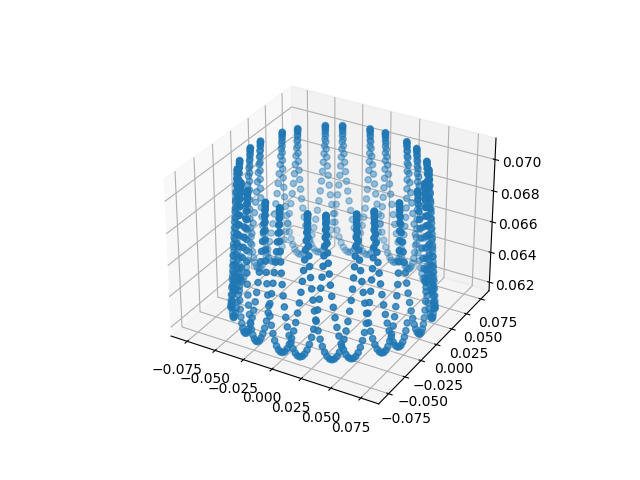

In [26]:
# Plotting the trajectory in 3D using a line plot for each time step
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(xsol, ysol, zsol, label='parametric curve')

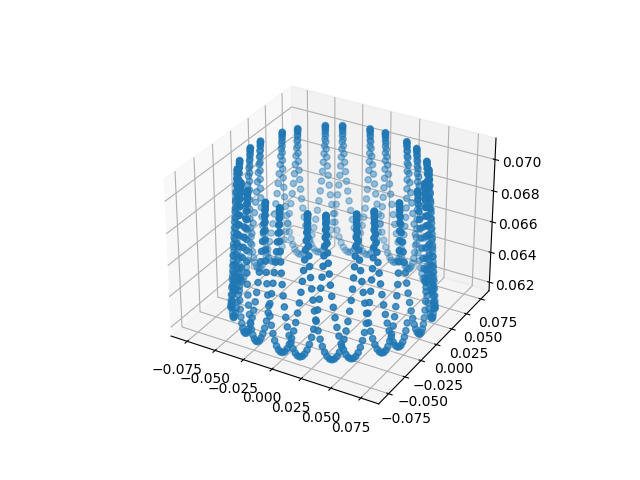

In [27]:
from matplotlib.animation import FuncAnimation

def update(num, xsol, ysol, zsol, sc):
    sc._offsets3d = (xsol[:num], ysol[:num], zsol[:num])
    return sc

ani = FuncAnimation(fig, update, frames=len(t), fargs=(xsol, ysol, zsol, sc),
                    interval=20, blit=False, repeat=False)

plt.show()

In [47]:
x0 = xsol[0]
y0 = ysol[0]
tclose = []
for i in range(15,len(t)):
    xactual = xsol[i]
    yactual = ysol[i]
    if abs(x0-xactual) < 0.01 and abs(y0-yactual) < 0.01:
        tclose.append(t[i])

print(min(tclose))

4.044044044044044


El tiempo de precesión es de al rededor de 4.04 segundos